#### packages

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import sklearn
import scipy
import matplotlib.pyplot as plt

In [2]:
pd.options.display.float_format = '{:.5f}'.format

In [3]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

##### Data

In [4]:
df = pd.read_csv('2023_07_27_data_step.csv', encoding='cp949')
df.isnull().sum()

pid              0
majorcat         0
province         0
area             0
sex              0
              ... 
삶의만족도_개인         0
삶의만족도_관계         0
삶의만족도_소속집단       0
종사자수          1235
업무만족도            0
Length: 117, dtype: int64

In [5]:
df_copy = df.copy()

##### 수도권에 취업한 사람 중 비수도권 대학은 없음

In [7]:
수도권 = df_copy[(df_copy['area']=='서울')|(df_copy['area']=='경기')].copy()

model = sm.Logit.from_formula('''LongWork2 ~ age + C(성별,Treatment("여자")) + C(건강상태) + C(결혼상태)''', 수도권).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.369841
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 1834
Model:                          Logit   Df Residuals:                     1828
Method:                           MLE   Df Model:                            5
Date:                Tue, 01 Aug 2023   Pseudo R-squ.:                 0.06890
Time:                        14:15:58   Log-Likelihood:                -678.29
converged:                       True   LL-Null:                       -728.48
Covariance Type:            nonrobust   LLR p-value:                 4.394e-20
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -7.5240      0.980     -7.679      0.000      -9.444      -5.604
C(성별, Treatment("여자"))[T.남자]    -0.0682      0.157     -0.433      0.665      -0.377       0.240
C(건강상태)[T.건강하지않다]               -0.3402      0.235     -1.445      0.148      -0.802       0.121
C(건강상태)[T.보통이다]                 -0.1454      0.163     -0.890      0.373      -0.466       0.175
C(결혼상태)[T.미혼]                   -1.0972      0.328     -3.341      0.001      -1.741      -0.453
age                              0.2591      0.033      7.739      0.000       0.193       0.325
================================================================================================
"""

In [8]:
print(f'모델 AIC:{model.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model.params,
        "Lower CI": model.conf_int()[0],
        "Upper CI": model.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:176.64696084126564




,OR,Lower CI,Upper CI
Intercept,0.00002,0.00000,0.00886
"C(성별, Treatment(""여자""))[T.남자]",1.18499,0.45608,3.07883
C(건강상태)[T.건강하지않다],0.51934,0.10751,2.50884
C(건강상태)[T.보통이다],0.76083,0.29133,1.98694
C(결혼상태)[T.미혼],0.30689,0.05526,1.70431
age,1.45524,1.19439,1.77306


In [11]:
model_2 = sm.Logit.from_formula('''LongWork2 ~ 나이 + C(성별,Treatment("여자")) + C(건강상태,Treatment("건강하지않다")) 
    + C(결혼상태, Treatment("미혼"))+ C(전공일치,Treatment("맞지않다")) 
    + 학점 + C(재학중일자리경험,Treatment('없다'))''', 수도권).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.358552
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 1738
Model:                          Logit   Df Residuals:                     1728
Method:                           MLE   Df Model:                            9
Date:                Tue, 01 Aug 2023   Pseudo R-squ.:                 0.08757
Time:                        14:17:59   Log-Likelihood:                -623.16
converged:                       True   LL-Null:                       -682.97
Covariance Type:            nonrobust   LLR p-value:                 1.607e-21
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                               -8.5550      1.024     -8.355      0.000     -10.562      -6.548
C(성별, Treatment("여자"))[T.남자]            -0.1048      0.165     -0.634      0.526      -0.429       0.219
C(건강상태, Treatment("건강하지않다"))[T.건강하다]     0.4330      0.256      1.694      0.090      -0.068       0.934
C(건강상태, Treatment("건강하지않다"))[T.보통이다]     0.2878      0.277      1.039      0.299      -0.255       0.831
C(결혼상태, Treatment("미혼"))[T.기혼]           1.1267      0.346      3.255      0.001       0.448       1.805
C(전공일치, Treatment("맞지않다"))[T.보통이다]       0.2265      0.186      1.216      0.224      -0.139       0.592
C(전공일치, Treatment("맞지않다"))[T.잘맞다]        0.4778      0.174      2.750      0.006       0.137       0.818
C(재학중일자리경험, Treatment('없다'))[T.있다]      -0.4808      0.149     -3.222      0.001      -0.773      -0.188
나이                                       0.2638      0.035      7.561      0.000       0.195       0.332
학점                                      -0.2049      0.137     -1.498      0.134      -0.473       0.063
========================================================================================================
"""

In [14]:
print(f'모델 AIC:{model_2.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios = pd.DataFrame(
    {
        "OR": model_2.params,
        "Lower CI": model_2.conf_int()[0],
        "Upper CI": model_2.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
odds_ratios

모델 AIC:150.36120672506894




,OR,Lower CI,Upper CI
Intercept,0.00004,0.00000,0.01979
"C(성별, Treatment(""여자""))[T.남자]",1.61164,0.52568,4.94105
"C(건강상태, Treatment(""건강하지않다""))[T.건강하다]",0.95647,0.18115,5.05009
"C(건강상태, Treatment(""건강하지않다""))[T.보통이다]",0.66646,0.10791,4.11620
"C(결혼상태, Treatment(""미혼""))[T.기혼]",5.00580,0.67761,36.98011
"C(전공일치, Treatment(""맞지않다""))[T.보통이다]",0.70552,0.19824,2.51093
"C(전공일치, Treatment(""맞지않다""))[T.잘맞다]",1.80280,0.62652,5.18754
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.28516,0.10759,0.75582
나이,1.49093,1.17644,1.88950
학점,0.39965,0.19588,0.81541


In [10]:
수도권.대학지역.value_counts()

대학지역
수도권    1834
Name: count, dtype: int64

In [12]:
수도권.shape

(1834, 117)

In [13]:
model_3 = sm.Logit.from_formula('''LongWork2 ~ 나이 + C(성별,Treatment('여자')) + C(건강상태,Treatment('건강하지않다')) 
    + C(결혼상태, Treatment('미혼')) + C(전공일치,Treatment('맞지않다')) 
    + 학점 + C(재학중일자리경험,Treatment('없다')) + C(삶의만족도_개인,Treatment('그렇지않다')) 
    + C(삶의만족도_관계, Treatment('그렇지않다')) + C(삶의만족도_소속집단, Treatment('그렇지않다')) +
    C(업무만족도,Treatment('그렇지않다')) ''', 수도권).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.346502
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              LongWork2   No. Observations:                 1738
Model:                          Logit   Df Residuals:                     1720
Method:                           MLE   Df Model:                           17
Date:                Tue, 01 Aug 2023   Pseudo R-squ.:                  0.1182
Time:                        14:18:17   Log-Likelihood:                -602.22
converged:                       True   LL-Null:                       -682.97
Covariance Type:            nonrobust   LLR p-value:                 1.349e-25
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -8.1526      1.054     -7.732      0.000     -10.219      -6.086
C(성별, Treatment('여자'))[T.남자]                 -0.1217      0.169     -0.719      0.472      -0.454       0.210
C(건강상태, Treatment('건강하지않다'))[T.건강하다]          0.3445      0.276      1.247      0.212      -0.197       0.886
C(건강상태, Treatment('건강하지않다'))[T.보통이다]          0.2768      0.288      0.960      0.337      -0.289       0.842
C(결혼상태, Treatment('미혼'))[T.기혼]                1.1191      0.358      3.125      0.002       0.417       1.821
C(전공일치, Treatment('맞지않다'))[T.보통이다]            0.1759      0.190      0.924      0.355      -0.197       0.549
C(전공일치, Treatment('맞지않다'))[T.잘맞다]             0.2940      0.181      1.624      0.104      -0.061       0.649
C(재학중일자리경험, Treatment('없다'))[T.있다]           -0.5019      0.153     -3.283      0.001      -0.802      -0.202
C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]       -0.0880      0.298     -0.296      0.768      -0.671       0.495
C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]      -0.3968      0.281     -1.410      0.159      -0.948       0.155
C(삶의만족도_관계, Treatment('그렇지않다'))[T.그렇다]       -0.9172      0.395     -2.322      0.020      -1.691      -0.143
C(삶의만족도_관계, Treatment('그렇지않다'))[T.보통이다]      -0.4588      0.279     -1.646      0.100      -1.005       0.087
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.그렇다]      0.8118      0.357      2.276      0.023       0.113       1.511
C(삶의만족도_소속집단, Treatment('그렇지않다'))[T.보통이다]     0.7171      0.232      3.093      0.002       0.263       1.172
C(업무만족도, Treatment('그렇지않다'))[T.그렇다]          -1.2298      0.253     -4.857      0.000      -1.726      -0.734
C(업무만족도, Treatment('그렇지않다'))[T.보통이다]         -0.4300      0.168     -2.563      0.010      -0.759      -0.101
나이                                            0.2660      0.036      7.446      0.000       0.196       0.336
학점                                           -0.2013      0.139     -1.446      0.148      -0.474       0.072
=============================================================================================================
"""

In [14]:
print(f'모델 AIC:{model_3.aic}')
print('\n')

# 오즈비 계산(Confidence interval 포함)
odds_ratios_3 = pd.DataFrame(
    {
        "OR": model_3.params,
        "Lower CI": model_3.conf_int()[0],
        "Upper CI": model_3.conf_int()[1],
    }
)
odds_ratios_3 = np.exp(odds_ratios_3)
odds_ratios_3

모델 AIC:1240.4409420468246




,OR,Lower CI,Upper CI
Intercept,0.00029,0.00004,0.00227
"C(성별, Treatment('여자'))[T.남자]",0.88539,0.63524,1.23405
"C(건강상태, Treatment('건강하지않다'))[T.건강하다]",1.41122,0.82131,2.42484
"C(건강상태, Treatment('건강하지않다'))[T.보통이다]",1.31889,0.74935,2.32129
"C(결혼상태, Treatment('미혼'))[T.기혼]",3.06215,1.51781,6.17785
"C(전공일치, Treatment('맞지않다'))[T.보통이다]",1.19231,0.82110,1.73134
"C(전공일치, Treatment('맞지않다'))[T.잘맞다]",1.34172,0.94105,1.91298
"C(재학중일자리경험, Treatment('없다'))[T.있다]",0.60536,0.44860,0.81690
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.그렇다]",0.91577,0.51096,1.64129
"C(삶의만족도_개인, Treatment('그렇지않다'))[T.보통이다]",0.67245,0.38734,1.16742


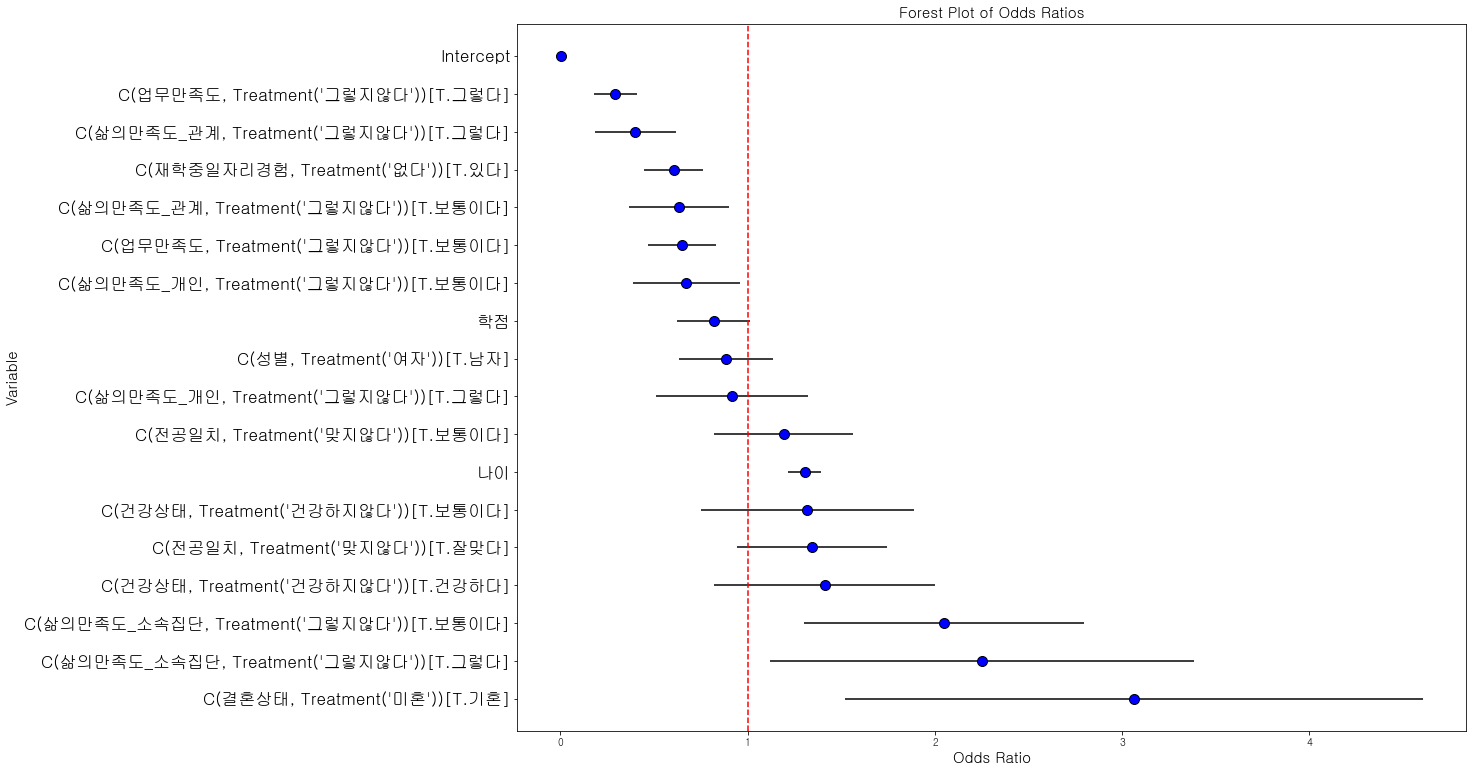

In [15]:
# 오즈비 순서대로 

# Define the data
data = [(var, odds_ratios_3.loc[var, "OR"], odds_ratios_3.loc[var, "Lower CI"], odds_ratios_3.loc[var, "Upper CI"]) for var in odds_ratios_3.index]

# Sort the data by the odds ratio
data = sorted(data, key=lambda x: x[1], reverse=True)

# Set the figure size
plt.figure(figsize=(17, 13))

# Plot the data
plt.errorbar([x[1] for x in data], range(len(data)), xerr=[x[1] - x[2] for x in data], fmt='o', color='black', 
             markersize=10, markerfacecolor='blue')

# Add the vertical line
plt.axvline(x=1, color='red', linestyle='--')

# Add the labels and title
plt.yticks(range(len(data)), [x[0] for x in data], fontsize=17)
plt.xlabel('Odds Ratio', fontsize=15)
plt.ylabel('Variable', fontsize=15)
plt.title('Forest Plot of Odds Ratios', fontsize=15)

# Show the plot
plt.show()

In [24]:
import forestplot as fp

In [31]:
fp.forestplot(daegu,  # the dataframe with results data
              estimate="OR",  # col containing estimated effect size 
              ll="ll", hl="hl",  # columns containing conf. int. lower and higher limits
              varlabel="label",  # column containing variable label
              ylabel="Confidence interval",  # y-label title
              xlabel="Pearson correlation",  # x-label title
              )

KeyError: 'OR'

In [28]:
help(fp.forestplot)

Help on function forestplot in module forestplot.plot:

forestplot(dataframe: pandas.core.frame.DataFrame, estimate: str, varlabel: str, ll: Optional[str] = None, hl: Optional[str] = None, form_ci_report: bool = True, ci_report: bool = True, groupvar: Optional[str] = None, group_order: Union[list, tuple, NoneType] = None, logscale: bool = False, annote: Optional[Sequence[str]] = None, annoteheaders: Optional[Sequence[str]] = None, rightannote: Optional[Sequence[str]] = None, right_annoteheaders: Optional[Sequence[str]] = None, pval: Optional[str] = None, capitalize: Optional[str] = None, starpval: bool = True, sort: bool = False, sortby: Optional[str] = None, flush: bool = True, decimal_precision: int = 2, figsize: Union[Tuple, List] = (4, 8), xticks: Union[list, range, NoneType] = None, ylabel: Optional[str] = None, xlabel: Optional[str] = None, yticker2: Optional[str] = None, color_alt_rows: bool = False, return_df: bool = False, preprocess: bool = True, table: bool = False, **kwargs